In [2]:
import pandas as pd
import tabula
import matplotlib.pyplot as plt
import numpy as np
import os
import string

In [3]:
 os.chdir("D:/consultoría")

In [5]:
#Archivo INFONAVIT


doc="https://github.com/claudiodanielpc/30DayChartChallenge/raw/main/2022/day_1/Oferentes_ECUVE_noviembre_2021.pdf"

###Importar solo la primera tabla

df = tabula.read_pdf(doc,pages="19-20", stream=True)

In [6]:
df

[   Unnamed: 0       Unnamed: 1                                Unnamed: 2  \
 0         NaN              NaN                                       NaN   
 1     Entidad       Municipios                        Grupo de Oferentes   
 2         NaN  Total LA PIEDAD                                       NaN   
 3         NaN  LAZARO CARDENAS                           IDELCO SA DE CV   
 4         NaN              NaN        RESIDENCIAL TORREON NUEVO SA DE CV   
 ..        ...              ...                                       ...   
 85        NaN              NaN  SIN INFORMACIÓN QUE IDENTIFIQUE UN GRUPO   
 86        NaN      Total AYALA                                       NaN   
 87        NaN          CUAUTLA   GRUPO FINANCIERO BBVA BANCOMER SA DE CV   
 88        NaN              NaN  SIN INFORMACIÓN QUE IDENTIFIQUE UN GRUPO   
 89        NaN    Total CUAUTLA                                       NaN   
 
          Unnamed: 3 Unnamed: 4 Unnamed: 5    1/  
 0          Vivienda   

In [7]:
infonavit=pd.concat([df[0],df[1]])

In [8]:
infonavit

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,1/
0,NaN,NaN,NaN,Vivienda,Total,ECUVE,NaN
1,Entidad,Municipios,Grupo de Oferentes,Nueva Existente,Créditos,Promedio,NaN
2,NaN,Total LA PIEDAD,NaN,30 83,113,121,NaN
3,NaN,LAZARO CARDENAS,IDELCO SA DE CV,6,6,111,NaN
4,NaN,NaN,RESIDENCIAL TORREON NUEVO SA DE CV,13,13,107,NaN
...,...,...,...,...,...,...,...
88,NaN,NaN,GRUPO EMPRESARIAL ALICA,24,24,109,NaN
89,NaN,NaN,INFONAVIT (VIVIENDA REASIGNADA),5,5,125,NaN
90,NaN,NaN,INGENIERIA MEXICANA Y CONSTRUCCIONES SA DE CV,1,1,114,NaN
91,NaN,NaN,SIN INFORMACIÓN QUE IDENTIFIQUE UN GRUPO,34 547,581,120,NaN


In [9]:
infonavit=infonavit.rename(columns=infonavit.iloc[1])
infonavit.columns = infonavit.columns.str.lower()

infonavit=infonavit.fillna(method='ffill')
infonavit = infonavit[infonavit["municipios"].str.contains("Total|Municipios") == False]

##Municipios
mun=["ATLATLAHUCAN","AYALA","CUAUTLA",
"CUERNAVACA","EMILIANO ZAPATA", "HUITZILAC",
"JIUTEPEC", "JOJUTLA", "PUENTE DE IXTLA", "TEMIXCO",
"TEPALCINGO", "TEPOZTLAN","TLALTIZAPAN", "TLAQUILTENANGO",
"TLAYACAPAN", "XOCHITEPEC","YAUTEPEC", "YECAPIXTLA", "ZACATEPEC DE HIDALGO"
]
infonavit = infonavit[infonavit["municipios"].isin(mun)] 

dict = {"ZACATEPEC DE HIDALGO" : 'ZACATEPEC'}

infonavit=infonavit.replace({"municipios": dict})

infonavit[['nueva','existente']] = infonavit["nueva existente"].str.split(" ", 1, expand=True)


infonavit['entidad'] = np.where(infonavit["entidad"]!="Morelos", "Morelos", infonavit["entidad"])

#Seleccionar variables

infonavit = infonavit[["entidad", "municipios", "grupo de oferentes", "nueva", "existente", "créditos"]]

#Nones a cero
infonavit.fillna(value=0, inplace=True)

##Columnas a numérico
infonavit[['nueva', 'existente', 'créditos']] = infonavit[['nueva', 'existente', 'créditos']].astype(int)


##Añadir información y modificar

#Cuernavaca
falta = pd.DataFrame({
        'grupo de oferentes':["CONSTRUCCIONES VALES SA DE CV", 
        "GRUPO FINANCIERO BBVA BANCOMER SA DE CV",
        "PLANET INMOBILIARIA",
        "SIN INFORMACIÓN QUE IDENTIFIQUE UN GRUPO"
        ],
        "nueva": [6,0,1,40],
        "existente":[1,1,0,194],
        "créditos":[7,1,1,234]
       })

   
  
infonavit=pd.concat([infonavit,falta],ignore_index=True)

infonavit['entidad'] = np.where(infonavit["entidad"]!="Morelos", "Morelos", infonavit["entidad"])
infonavit['municipios'] = infonavit['municipios'].replace(np.nan, "CUERNAVACA")

infonavit.loc[2,['nueva','existente']] = [13,88]
infonavit.loc[3,['nueva','existente']] = [0,1]
infonavit.loc[8,['nueva','existente']] = [0,1]
infonavit.loc[12,['nueva','existente']] = [0,4]
infonavit.loc[19,['nueva','existente']] = [0,3]
infonavit.loc[21,['nueva','existente']] = [0,1]
infonavit.loc[22,['nueva','existente']] = [0,37]
infonavit.loc[24,['nueva','existente']] = [0,3]
infonavit=infonavit.rename(columns={"grupo de oferentes": "oferente"})

In [10]:
print("Vivienda nueva:", infonavit["nueva"].sum())
print("Vivienda existente:", infonavit["existente"].sum())
print("Total de créditos:", infonavit["créditos"].sum())

Vivienda nueva: 871
Vivienda existente: 1602
Total de créditos: 2473


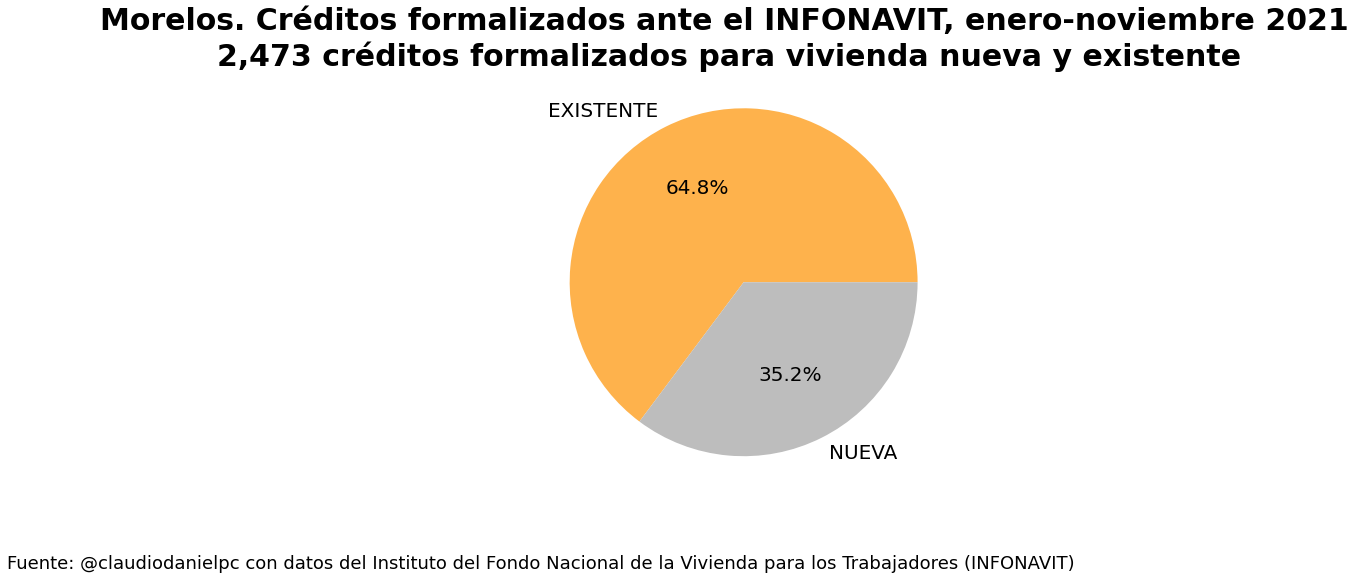

In [11]:
tipoinfonavit=pd.melt(infonavit, id_vars='entidad', value_vars=['nueva', 'existente'])
tipoinfonavit=tipoinfonavit.groupby(["variable"])["value"].sum().reset_index()

tipoinfonavit['variable'] = tipoinfonavit['variable'].str.upper()

fig=plt.figure(figsize=(16,8))
ax1 = plt.subplot(111, aspect='equal')



tipoinfonavit.groupby(['variable']).sum().plot(kind='pie', y='value',ax=ax1, autopct='%1.1f%%',label="",
                                colors = [ '#feb24c', '#bdbdbd'], fontsize=20)
ax1.get_legend().remove()
fig.suptitle(f'Morelos. Créditos formalizados ante el INFONAVIT, enero-noviembre 2021 \n'
f'{sum( tipoinfonavit["value"] ) :,.0f} créditos formalizados para vivienda nueva y existente\n', fontweight="bold", fontsize=30)

    #Fuente del gráfico
fig.text(0.8, 0.005,
        "Fuente: @claudiodanielpc con datos del Instituto del Fondo Nacional de la Vivienda para los Trabajadores (INFONAVIT)",ha="right",
         size=18)

fig.savefig('inf1.png', bbox_inches='tight')